In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
data = {'Temperature (°C)': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
        'Power Consumption (kWh)': [300, 310, 320, 330, 345, 360, 370, 390, 420, 450]}

df = pd.DataFrame(data)

display(df)

,Temperature (°C),Power Consumption (kWh)
0,10,300
1,12,310
2,14,320
3,16,330
4,18,345
5,20,360
6,22,370
7,24,390
8,26,420
9,28,450


In [ ]:
X=df[["Temperature (°C)"]]
Y=df[["Power Consumption (kWh)"]]

In [ ]:
X=sm.add_constant(X)

In [ ]:
model=sm.OLS(Y,X).fit()

In [ ]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Power Consumption (kWh)   R-squared:                       0.955
Model:                                 OLS   Adj. R-squared:                  0.950
Method:                      Least Squares   F-statistic:                     171.6
Date:                     Tue, 21 Oct 2025   Prob (F-statistic):           1.10e-06
Time:                             19:18:29   Log-Likelihood:                -37.005
No. Observations:                       10   AIC:                             78.01
Df Residuals:                            8   BIC:                             78.61
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
pred=model.get_prediction(X)
confident_val=0.95
alpha=1-confident_val
conf_init=pred.conf_int(alpha=alpha)
predicted=model.predict(X)

In [ ]:
result=df.copy()
result["predicted"]=predicted
result["Lower_CI"]=conf_init[:,0]
result["Upper_CI"]=conf_init[:,1]
result

,Temperature (°C),Power Consumption (kWh),predicted,Lower_CI,Upper_CI
0,10,300,288.454545,273.616667,303.292424
1,12,310,304.242424,291.658204,316.826645
2,14,320,320.030303,309.446704,330.613902
3,16,330,335.818182,326.811931,344.824432
4,18,345,351.606061,343.502818,359.709303
5,20,360,367.393939,359.290697,375.497182
6,22,370,383.181818,374.175568,392.188069
7,24,390,398.969697,388.386098,409.553296
8,26,420,414.757576,402.173355,427.341796
9,28,450,430.545455,415.707576,445.383333


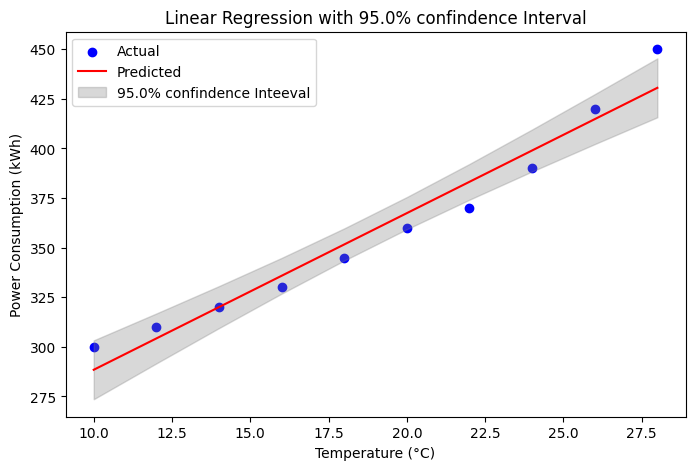

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["Temperature (°C)"],df["Power Consumption (kWh)"], color='blue', label="Actual")
plt.plot(df["Temperature (°C)"], predicted, color="red", label="Predicted")
plt.fill_between(df["Temperature (°C)"], result["Lower_CI"], result["Upper_CI"], color="gray", alpha=0.3, label=f"{confident_val*100}% confindence Inteeval")
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Consumption (kWh)")
plt.title(f"Linear Regression with {confident_val*100}% confindence Interval")
plt.legend()
plt.show()